### RNAseq analysis on Aprcot winter dormancy

Reference genome and annotation: _Prunus persicav2.0_, _Prunus persica annotation info v2.1_ from [pythozome](https://phytozome.jgi.doe.gov/pz/portal.html#!bulk?org=Org_Ppersica).

data access:    
[gene raw counts](https://github.com/statonlab/apricot_rnaseq/blob/master/data/gene_counts.txt).   
[sample annotation](https://github.com/statonlab/apricot_rnaseq/blob/master/data/MydataDesign_1.csv). 


### Analysis pipeline
* FASTQC
* Mapping with reference genome by STAR
* HTSeq-cout     
[Details](https://github.com/mestato/statonlabprivate/wiki/Apricot-RNAseq-analysis)
* DESeq (in R) with the following codes. 

In [4]:
# Load required packages
library(DESeq2)
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [8]:
library(RCurl)

Loading required package: bitops


In [12]:
# Load HTseq count data
mydata <- read.table(text=getURL("https://raw.githubusercontent.com/statonlab/apricot_rnaseq/master/data/gene_counts.txt"), check.names = F, stringsAsFactors = F, header = TRUE, row.names = 1)
head(mydata)

,10_0,10-100,10-400,10-800,10-C,10-D,11-C,11-D,12-C,12-D,⋯,8-400,8-800,8-C,8-D,9_0,9-100,9-400,9-800,9-C,9-D
Prupe.1G000100.v2.1,320,273,161,63,253,230,332,255,484,322,⋯,299,262,236,243,268,272,299,158,241,134
Prupe.1G000200.v2.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Prupe.1G000300.v2.1,666,603,503,219,515,414,606,532,750,606,⋯,640,509,498,452,583,491,534,440,416,264
Prupe.1G000400.v2.1,917,2019,777,552,521,381,686,593,732,642,⋯,1291,2325,638,436,801,2516,2031,2033,507,214
Prupe.1G000500.v2.1,274,589,157,80,807,1055,1613,1553,1151,1198,⋯,285,253,916,857,371,685,391,357,923,1028
Prupe.1G000600.v2.1,1119,794,583,493,732,665,615,577,687,618,⋯,844,776,731,624,932,690,674,771,618,525


In [13]:
# Import data description table, regroup 800 timepoint, early bloom tree as flower-800, late bloom tree as bud-800
MydataDesign_1 <- read.csv(text=getURL("https://raw.githubusercontent.com/statonlab/apricot_rnaseq/master/data/MydataDesign_1.csv"),check.names = F, stringsAsFactors = T, row.names = 1)
MydataDesign_1$phenotype_stage <- factor(paste0(MydataDesign_1$phenotype,"_",MydataDesign_1$Stage))
dds = DESeqDataSetFromMatrix(countData = mydata, colData = MydataDesign_1, design = ~Stage)
dim(dds)


  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]


[1] 26872    60

In [14]:
dds = DESeq(dds)

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
final dispersion estimates
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a messag

In [15]:
# PCA plot
rld <- rlog(dds, blind = FALSE)
#pcahead(assay(rld), 3)

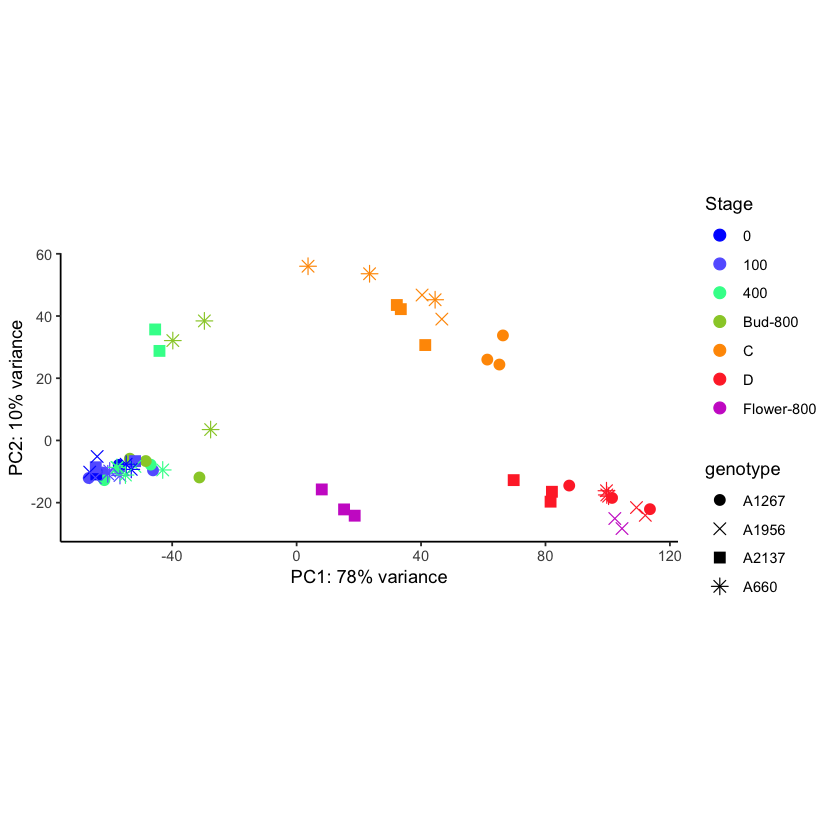

In [16]:
pcaData <- plotPCA(rld, intgroup = c("Stage", "genotype"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
library(ggplot2)
ggplot(subset(pcaData, genotype %in% c("A1956","A2137","A1267","A660")), aes(PC1, PC2, color=Stage, shape=genotype)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed() +
  theme(text = element_text(size=16))+
  theme_classic()+
  scale_shape_manual(values = c(16,4,15,8)) +
  scale_color_manual(values=c("#0033FF", "#6666FF", "#33FF99","#99CC33","#FF9900","#FF3333","#CC33CC"))
#ggsave("PCAplot0423.png")

In [34]:
# Plot DAM genes
TimePlot <- function(x) {
  data <- plotCounts(dds, gene=x,intgroup=c("Stage","genotype"), returnData=TRUE)
  plot <-
    ggplot(data, aes(x=Stage, y=count, color=genotype, group=genotype)) +
    geom_point(size=2) + geom_smooth(se = FALSE, method = "loess") +
    scale_color_manual(values=c("#0033FF","#FF3333","#FF9999","#99CCFF")) + scale_y_log10()
  #print(plot)
  #  return()
}


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 5”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  8.8157e-18”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 5”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  8.8157e-18”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 5”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2”Warning message in simpleLoess(y, x, w, span, degree =

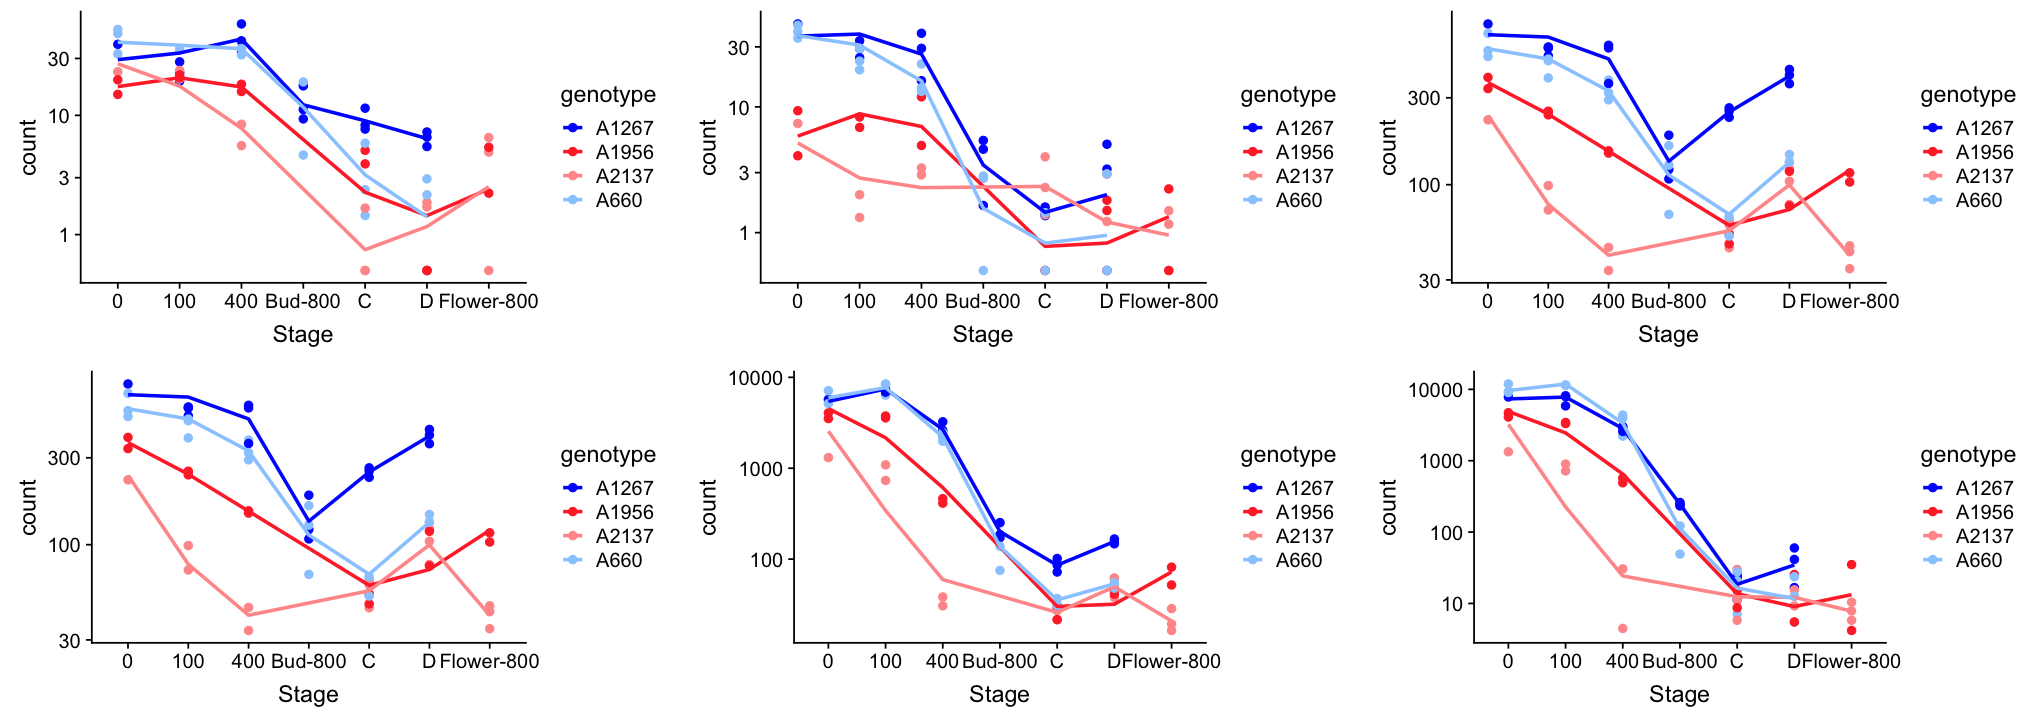

In [35]:
DAM1 = TimePlot("ppa018667m.g.v1.0")
DAM2 = TimePlot("ppb017585m.g.v1.0")
DAM3 = TimePlot("ppa010758m.g.v1.0")
DAM4 = TimePlot("ppa011123m.g.v1.0")
DAM5 = TimePlot("ppa010822m.g.v1.0")
DAM6 = TimePlot("ppa010714m.g.v1.0")
plot_DAM <- plot_grid(DAM1,DAM2, DAM3, DAM3,DAM5, DAM6, ncol = 3, nrow = 2) #+ theme(text = element_text(size=8))
options(repr.plot.width=17, repr.plot.height=6)
plot_DAM #+ theme(text = element_text(size=8))

### Differential expression analysis

In [39]:
resultsNames(dds)

[1] "Intercept"             "Stage_100_vs_0"        "Stage_400_vs_0"       
[4] "Stage_Bud.800_vs_0"    "Stage_C_vs_0"          "Stage_D_vs_0"         
[7] "Stage_Flower.800_vs_0"

In [43]:
res <- results(dds, contrast = c('Stage', '0', '100'),lfcThreshold = 1, alpha = 0.05)
summary(res)


out of 25960 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 39, 0.15% 
LFC < 0 (down)   : 223, 0.86% 
outliers [1]     : 7, 0.027% 
low counts [2]   : 1508, 5.8% 
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



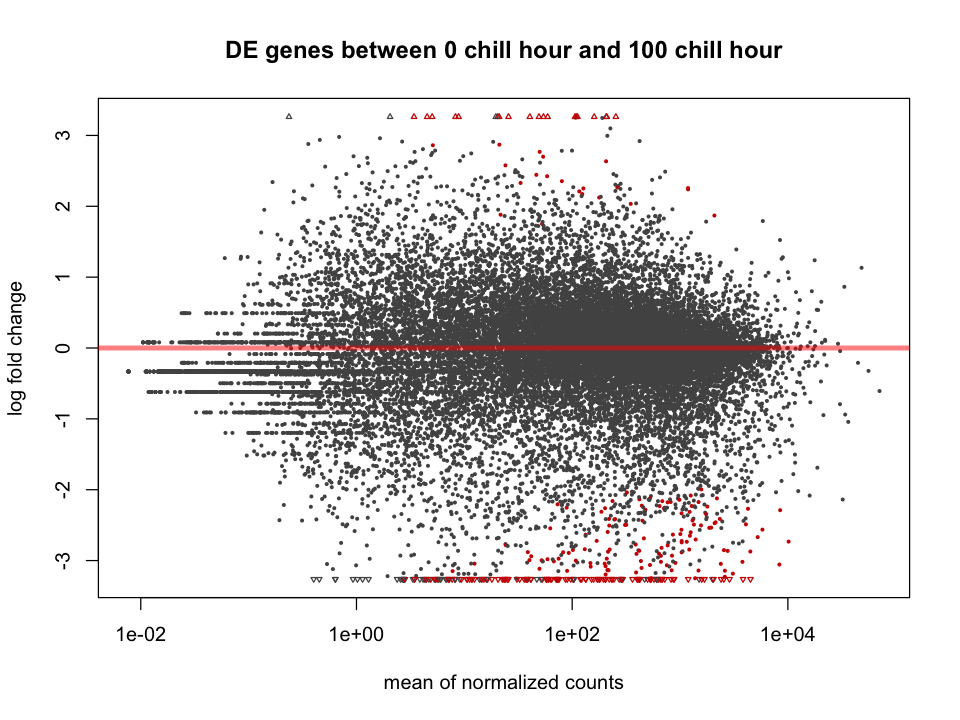

In [45]:
options(repr.plot.width=8, repr.plot.height=6)
plotMA(res, main = "DE genes between 0 chill hour and 100 chill hour")

In [46]:
resSig <- res[ which(res$padj < 0.05),]
write.csv(x = resSig, file = "Sig_genes_0v100.csv")